In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading

#### 2.1 Data Collection

In [256]:
intakes = pd.read_csv('data/aac_intakes.csv')
intakes_outcomes = pd.read_csv('data/aac_intakes_outcomes.csv')
outcomes = pd.read_csv('data/aac_outcomes.csv')

In [257]:
intakes = intakes.drop_duplicates(subset="animal_id")
outcomes = outcomes.drop_duplicates(subset="animal_id")
intakes_outcomes = intakes_outcomes.drop_duplicates(subset="animal_id_outcome")
intakes_outcomes = intakes_outcomes.drop_duplicates(subset="animal_id_intake")

intakes_outcomes = intakes_outcomes.rename(columns={
    "animal_id_intake": "animal_id",
})

# Step 3: Merge intakes and outcomes first
merged = pd.merge(intakes, outcomes, on="animal_id", how="outer")

# Step 4: Merge with intakes_outcomes
animal_data = pd.merge(merged, intakes_outcomes, on="animal_id", how="outer")

# Final shape
print("✅ Merged shape:", animal_data.shape)
animal_data.columns

✅ Merged shape: (73269, 63)


Index(['age_upon_intake_x', 'animal_id', 'animal_type_x', 'breed_x', 'color_x',
       'datetime_x', 'datetime2', 'found_location_x', 'intake_condition_x',
       'intake_type_x', 'name_x', 'sex_upon_intake_x', 'age_upon_outcome_x',
       'animal_type_y', 'breed_y', 'color_y', 'date_of_birth_x', 'datetime_y',
       'monthyear', 'name_y', 'outcome_subtype_x', 'outcome_type_x',
       'sex_upon_outcome_x', 'age_upon_outcome_y', 'animal_id_outcome',
       'date_of_birth_y', 'outcome_subtype_y', 'outcome_type_y',
       'sex_upon_outcome_y', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake_y', 'animal_type', 'breed', 'color',
       'found_location_y', 'intake_condition_y', 'intake_type_y',
       'sex_upon_intake_y', 'count', 'age_up

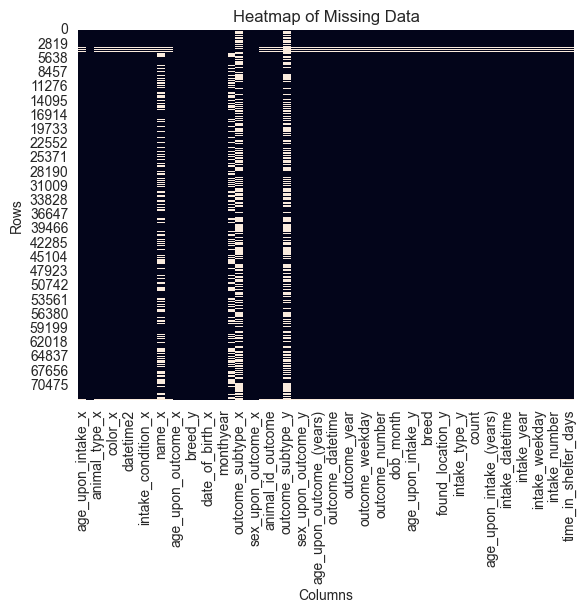

In [259]:
sorted_animal_data = animal_data.sort_index()

# Plot the heatmap
sns.heatmap(sorted_animal_data.isnull(), cbar=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [258]:
#animal_data = pd.concat([intakes, intakes_outcomes, outcomes])
animal_data = animal_data[['outcome_type', 'age_upon_intake', 'age_upon_outcome', 'animal_type', 'breed', 'color', 'intake_condition', 'intake_type', 'sex_upon_intake', 'datetime', 'outcome_datetime', 'time_in_shelter','date_of_birth']].copy()

display(animal_data.head())

KeyError: "['outcome_type', 'age_upon_intake', 'age_upon_outcome', 'intake_condition', 'intake_type', 'sex_upon_intake', 'datetime', 'date_of_birth'] not in index"

#### 2.1.1 Data Overview

In [194]:
print(animal_data.shape)
print(animal_data.info())
print(animal_data.isnull().sum())

(240540, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 240540 entries, 0 to 80680
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   outcome_type      160329 non-null  object
 1   age_upon_intake   159859 non-null  object
 2   age_upon_outcome  160345 non-null  object
 3   animal_type       240540 non-null  object
 4   breed             240540 non-null  object
 5   color             240540 non-null  object
 6   intake_condition  159859 non-null  object
 7   intake_type       159859 non-null  object
 8   sex_upon_intake   159857 non-null  object
 9   datetime          160868 non-null  object
 10  outcome_datetime  79672 non-null   object
 11  time_in_shelter   79672 non-null   object
 12  date_of_birth     160353 non-null  object
dtypes: object(13)
memory usage: 25.7+ MB
None
outcome_type         80211
age_upon_intake      80681
age_upon_outcome     80195
animal_type              0
breed                 

## 2.2 Data Cleaning

#### 2.2.1 Standardize Column Names

In [195]:
animal_data = animal_data.rename(
    columns={
        'animal_type' : "Animal_Type",
        'date_of_birth' : "DOB",
        'breed' : "Breed",
        'color' : "Color",
        'sex_upon_intake' : "Sex",
        'datetime' : "Intake_Date",
        'intake_condition': "Intake_Condition",
        'intake_type' : "Intake_Type",
        'outcome_datetime' : "Outcome_Date",
        'outcome_type' : "Outcome_Type",
        'age_upon_intake' : "Intake_Age",
        'age_upon_outcome' : "Outcome_Age",
        'time_in_shelter' : 'Days_in_Shelter'
    }
)

#### 2.2.2 Data Type Conversion

In [196]:
animal_data = animal_data.astype(
    {
        'Outcome_Type' : 'category',
        'Intake_Age' : 'object',
        'Outcome_Age' : 'object',
        'Animal_Type' : 'category',
        'Breed' : 'object',
        'Color' : 'category',
        'Intake_Condition' : 'category',
        'Intake_Type' : 'category',
        'Sex' : 'category',
        'Intake_Date' : 'datetime64[ns]',
        'Outcome_Date' : 'datetime64[ns]',
        'Days_in_Shelter' : 'object'
    }
)

animal_data['Days_in_Shelter'] = pd.to_timedelta(animal_data['Days_in_Shelter'], errors='coerce')
animal_data['Intake_Date'] = pd.to_datetime(animal_data['Intake_Date'], errors='coerce')
animal_data['Outcome_Date'] = pd.to_datetime(animal_data['Outcome_Date'], errors='coerce')
animal_data["DOB"] = pd.to_datetime(animal_data["DOB"], errors='coerce')

#### 2.2.3 Split & Standardize Color

In [197]:
animal_data['Color'] = animal_data['Color'].str.lower()
animal_data[['Primary_Color', 'Secondary_Color']] = animal_data['Color'].str.split('/', n=1, expand=True)
animal_data['Secondary_Color'] = animal_data['Secondary_Color'].fillna("None")


#### 2.2.4 Set Shelter Name

In [198]:
animal_data['Shelter_Name'] = 'Austin Texas Animal Shelter'

#### 2.2.5 Convert Intake_Age to Intake_Age (Days)

In [199]:
def getDays(text):
    if isinstance(text, str) and ' ' in text:
        num, time = text.split(" ")
        num = int(num)
        if time.lower() == 'days':
            return num
        if time.lower() == 'months':
            return int(num * 30)
        if time.lower() == 'years':
            return int(num * 365.25)
    elif isinstance(text, (int, float)):
        return float(text)
    return 0

animal_data['Intake_Age'] = animal_data['Intake_Age'].apply(getDays)

#### 2.2.6 Extract Days in Shelter

In [200]:
animal_data['Days_in_Shelter_Parsed'] = animal_data['Days_in_Shelter'].astype(str).str.extract(r'(\d+)\s+days') .astype(float)

#### 2.2.7 Drop Columns

In [201]:
animal_data.drop(columns=['Color'], inplace=True)

## 2.3 Data Inspection & Cleaning

#### 2.3.1 Duplicate Values

In [202]:
print(animal_data.duplicated().sum())
animal_data = animal_data.drop_duplicates()

9105


#### 2.3.2 Missing Values

In [245]:
animal_data.isna().sum()

Outcome_Type               75459
Intake_Age                 78093
Outcome_Age                75443
Animal_Type                    0
Breed                          0
Intake_Condition           78093
Intake_Type                78093
Sex                        78095
Intake_Date                    0
Outcome_Date              153528
Days_in_Shelter           153528
DOB                       153528
Primary_Color                  0
Secondary_Color                0
Shelter_Name                   0
Days_in_Shelter_Parsed    153528
dtype: int64

##### 2.3.2.1 Investigate Missing Data

After a visual inspection, it is most likely that certain features were not recorded until a certain timeframe possibly due to data collection policy or data entry errors.

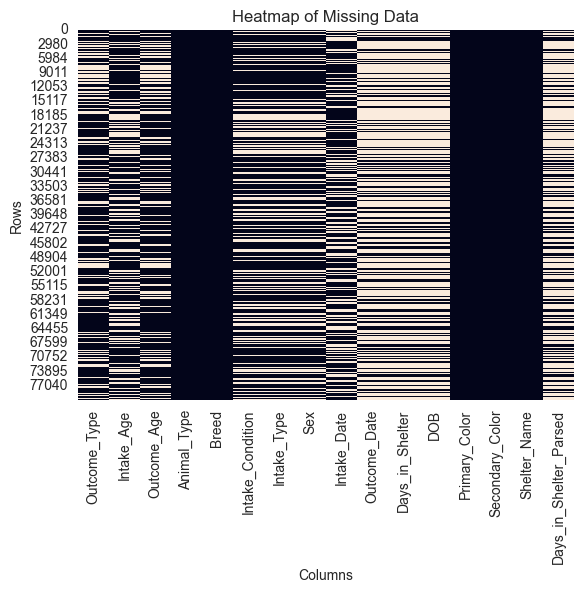

In [204]:
sorted_animal_data = animal_data.sort_index()

# Plot the heatmap
sns.heatmap(sorted_animal_data.isnull(), cbar=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

#### 2.3.3 Calculate Intake Date

In [205]:
animal_data['Intake_Date'] = animal_data['Intake_Date'].fillna(animal_data['Outcome_Date'] - animal_data['Days_in_Shelter'])

#### 2.3.4 Final Shape

In [206]:
print(animal_data.shape)
animal_data = animal_data.reset_index(drop=True)
animal_data.isna().sum()

(231435, 16)


Outcome_Type               75459
Intake_Age                 78093
Outcome_Age                75443
Animal_Type                    0
Breed                          0
Intake_Condition           78093
Intake_Type                78093
Sex                        78095
Intake_Date                    0
Outcome_Date              153528
Days_in_Shelter           153528
DOB                       153528
Primary_Color                  0
Secondary_Color                0
Shelter_Name                   0
Days_in_Shelter_Parsed    153528
dtype: int64

In [207]:
animal_data.dtypes

Outcome_Type                     category
Intake_Age                        float64
Outcome_Age                        object
Animal_Type                      category
Breed                              object
Intake_Condition                 category
Intake_Type                      category
Sex                              category
Intake_Date                datetime64[ns]
Outcome_Date               datetime64[ns]
Days_in_Shelter           timedelta64[ns]
DOB                        datetime64[ns]
Primary_Color                      object
Secondary_Color                    object
Shelter_Name                       object
Days_in_Shelter_Parsed            float64
dtype: object

## 3. Export Austin Animal Shelter Dataset

In [208]:
animal_data.to_csv('Austin_Animal_Data.csv', index=False)
print(animal_data.columns)

Index(['Outcome_Type', 'Intake_Age', 'Outcome_Age', 'Animal_Type', 'Breed',
       'Intake_Condition', 'Intake_Type', 'Sex', 'Intake_Date', 'Outcome_Date',
       'Days_in_Shelter', 'DOB', 'Primary_Color', 'Secondary_Color',
       'Shelter_Name', 'Days_in_Shelter_Parsed'],
      dtype='object')
